<a href="https://colab.research.google.com/github/valid999/Deeplearning_classification/blob/main/Tensorflow_classify_dogs%26cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

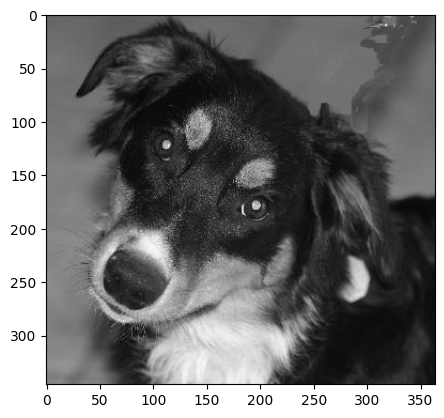

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR =  "/content/drive/MyDrive/kagglecatsanddogs_5340/PetImages"
CATEGORIES = ['Dog' , 'Cat']


for category in CATEGORIES:
    path = os.path.join(DATADIR , category)
    for img in os.listdir((path)):
        img_array = cv2.imread(os.path.join(path,img) ,  cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array , cmap = 'gray')
        plt.show()
        break
    break

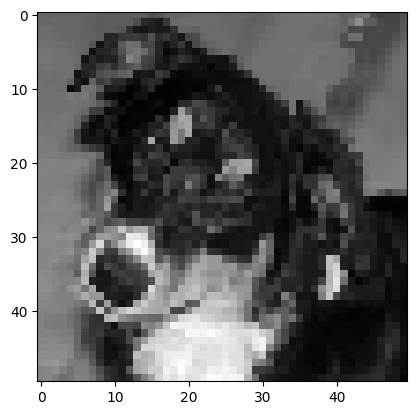

In [2]:
IMG_SIZE = 50

new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
plt.imshow(new_array , cmap = 'gray')
plt.show()

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR , category) # path to cats or dogs dir
        class_num =  CATEGORIES.index(category) # 0 is dog and 1 is a cat
        for img in os.listdir(path):
            try:


                img_array = cv2.imread(os.path.join(path,img) ,  cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
                training_data.append([new_array , class_num])
            except Exception as e :
                pass

create_training_data()

In [4]:
import random
random.shuffle(training_data)

In [5]:
X = [] # X is the feature
y = [] # y is the labels

In [6]:
for features , label in training_data:
    X.append(features)  # we can not pass a lsit to nueral network
    y.append(label)


# Change the chaneel to 3 because of the coldor if we worked with the color images meaning from grayscale to color
X = np.array(X).reshape(-1 , IMG_SIZE , IMG_SIZE , 1) # the nueral net work only except the array type -1 is the feature 1 because the grayscale
# if we change from the gray scale will be 3 because we work with color


In [7]:
import pickle
pickle_out = open('X.pickle' , 'wb')
pickle.dump(X , pickle_out)
pickle_out.close()


pickle_out = open('y.pickle' , 'wb')
pickle.dump(y , pickle_out)
pickle_out.close()

In [13]:
# The model perform well in the following criteria

"""
dense_layers = [0]
layer_size = [64]
conv_layers = [3]
"""

import tensorflow as tf
# from tensorflow.keras.dataset import cifar10
# from tensorflow.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


# protect from the over writing
NAME = "Cat-vs-dog-cnn-64x2-{}".format(int(time.time()))
# /content/drive the drive path
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

X = pickle.load(open("X.pickle" , "rb"))
y = pickle.load(open("y.pickle" , "rb"))


X = X/255.0
y = np.array(y)
# Create the random seed
tf.random.set_seed(42)

# Create the model
model = Sequential()
model.add(Conv2D(64 , (3,3) , input_shape = X.shape[1:])) # 64 unit
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64 , (3,3) ,input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# we need to flatten the data because of the dense is 1D but the convolutional 2D
model.add(Flatten()) # The flatten layer commonly used in the transition from
# the convolution layer to the full connected layer.
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy" ,
              optimizer = 'adam',
              metrics = ['accuracy']
              )

model.fit(X , y , epochs = 10 ,  batch_size = 32 , validation_split= 0.3, callbacks = [tensorboard])


Epoch 1/10
297/297 [==============================] - 60s 198ms/step - loss: 0.2808 - accuracy: 0.9185 - val_loss: 0.2834 - val_accuracy: 0.9148
Epoch 2/10
297/297 [==============================] - 60s 201ms/step - loss: 0.2631 - accuracy: 0.9207 - val_loss: 0.2660 - val_accuracy: 0.9148
Epoch 3/10
297/297 [==============================] - 60s 202ms/step - loss: 0.2411 - accuracy: 0.9207 - val_loss: 0.2555 - val_accuracy: 0.9148
Epoch 4/10
297/297 [==============================] - 59s 198ms/step - loss: 0.2230 - accuracy: 0.9207 - val_loss: 0.2453 - val_accuracy: 0.9148
Epoch 5/10
297/297 [==============================] - 64s 215ms/step - loss: 0.2102 - accuracy: 0.9207 - val_loss: 0.2506 - val_accuracy: 0.9148
Epoch 6/10
297/297 [==============================] - 60s 201ms/step - loss: 0.1924 - accuracy: 0.9218 - val_loss: 0.2500 - val_accuracy: 0.9165
Epoch 7/10
297/297 [==============================] - 57s 192ms/step - loss: 0.1739 - accuracy: 0.9313 - val_loss: 0.2514 - val_ac

In [14]:
# to save the model
model.save('64x3-CNN.model')